#  Import Necessary libraries

In [51]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,classification_report

#  Import Data

In [2]:
glass_data=pd.read_csv("glass.csv")
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Understanding

In [3]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass_data.duplicated().sum()

1

In [6]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
glass_data.drop_duplicates(inplace=True)  

In [8]:
glass_data.shape

(213, 10)

In [9]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Correlation matrix

In [11]:
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


### Heatmap

<AxesSubplot:>

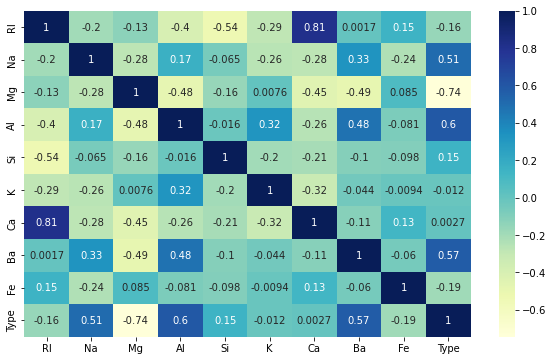

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(glass_data.corr(),annot=True,cmap="YlGnBu")

In [13]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [14]:
glass_data["Type"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [15]:
glass_data["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [16]:
glass_data.groupby(by=['Type','RI','Fe']).sum() #Chain methods

Na    Mg    Al     Si     K    Ca    Ba
Type RI      Fe                                              
1    1.51215 0.31  12.99  3.47  1.12  72.98  0.62  8.35  0.00
     1.51567 0.00  13.29  3.45  1.21  72.74  0.56  8.57  0.00
     1.51571 0.24  12.72  3.46  1.56  73.20  0.67  8.09  0.00
     1.51589 0.24  12.88  3.43  1.40  73.28  0.69  8.05  0.00
     1.51596 0.26  12.79  3.61  1.62  72.97  0.64  8.07  0.00
...                  ...   ...   ...    ...   ...   ...   ...
7    1.51838 0.00  14.32  3.26  2.22  71.25  1.46  5.79  1.63
     1.52065 0.00  14.36  0.00  2.02  73.42  0.00  8.44  1.64
     1.52247 0.00  14.86  2.20  2.06  70.26  0.76  9.76  0.00
     1.52315 0.00  13.44  3.34  1.23  72.38  0.60  8.83  0.00
     1.52365 0.00  15.79  1.83  1.31  70.43  0.31  8.61  1.68

[201 rows x 7 columns]

##  Checking for Imbalanced Dataset:

In [17]:
glass_data['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

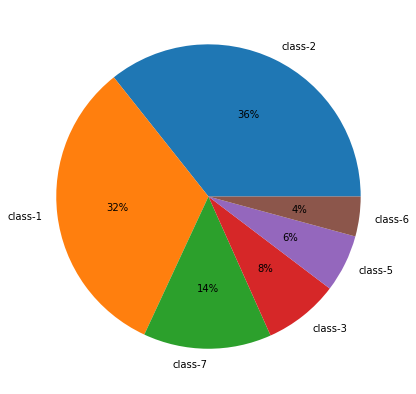

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,7))
plt.pie(x =glass_data['Type'].value_counts(),labels=["class-2","class-1","class-7","class-3","class-5","class-6"],autopct='%1.0f%%',data=glass_data)
plt.show()

## Data Preprocessing

### STANDARIZATION

In [19]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [20]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
X = glass_data.drop('Type',axis = 1)
y = glass_data[['Type']]

In [22]:
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [23]:
X.shape,y.shape

((213, 9), (213, 1))

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,stratify=y,random_state=12)

In [25]:
X_train.shape,y_train.shape

((170, 9), (170, 1))

In [26]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

###  Model Building || Model Training

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### K=3

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn_model.predict(X_train)

In [30]:
accuracy_score(y_train,y_pred)

0.8235294117647058

### K=5

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.7352941176470589

### K=7

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.7176470588235294

### K=9

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.711764705882353

##  Getting Optimal number for the K -value

In [34]:
from sklearn.model_selection import cross_val_score

##  1. Cross validation score plot:

In [56]:
container_cv_scores = []

for i in range(2,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator =knn_model, X = X_scaled,y=y,cv = 5)
    container_cv_scores.append(cv_scores.mean())
container_cv_scores

[0.6666666666666667,
 0.6527131782945736,
 0.6573643410852713,
 0.6527131782945736,
 0.6147286821705428,
 0.6337763012181618,
 0.615171650055371,
 0.6057585825027686,
 0.5962347729789591,
 0.5963455149501662,
 0.5918050941306755,
 0.5634551495016611,
 0.5584717607973422,
 0.5539313399778516,
 0.5681063122923589,
 0.5775193798449613,
 0.5869324473975637,
 0.5868217054263567,
 0.5634551495016611,
 0.5541528239202658,
 0.5495016611295681,
 0.5590254706533776,
 0.5448504983388704,
 0.5590254706533776,
 0.554485049833887,
 0.5637873754152823,
 0.5637873754152823,
 0.5497231450719823,
 0.5498338870431894]

### Plot

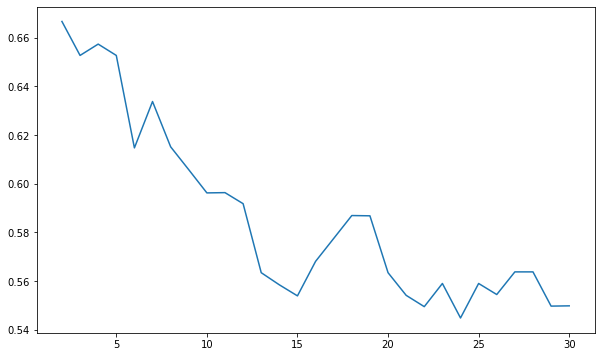

In [57]:
plt.figure(figsize=(10,6))
from matplotlib import pyplot as plt
plt.plot(range(2,31),container_cv_scores)

In [58]:
max(container_cv_scores)

0.6666666666666667

####  Index corrosponding : Max

In [59]:
container_cv_scores.index(max(container_cv_scores)) #This returns the index number. Wkt, index number starts from 0.

0

##  2.Train accuracy vs Test accuracy plot:

In [39]:
container_train_accuracy = []
container_test_accuracy = []


for i in range(2,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train,y_pred)
    y_test_pred=knn_model.predict(X_test)
    test_acc=accuracy_score(y_test,y_test_pred)
    container_train_accuracy.append(train_acc)
    container_test_accuracy.append(test_acc)

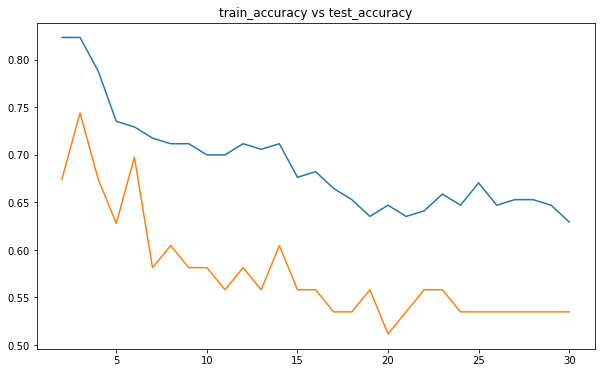

In [65]:
plt.figure(figsize=(10,6))
from matplotlib import pyplot as plt
plt.plot(range(2,31),container_train_accuracy)
plt.plot(range(2,31),container_test_accuracy)
plt.title("train_accuracy vs test_accuracy")
plt.show()

In [41]:
acc_dataframe=pd.DataFrame({"train_acc":container_train_accuracy,"test_acc":container_test_accuracy})
acc_dataframe

,train_acc,test_acc
0,0.823529,0.674419
1,0.823529,0.744186
2,0.788235,0.674419
3,0.735294,0.627907
4,0.729412,0.697674
5,0.717647,0.581395
6,0.711765,0.604651
7,0.711765,0.581395
8,0.700000,0.581395
9,0.700000,0.558140


### OBSERVATION :

### from above analysis we get :

####    K = 3 is the optimal number.

###  Model building:

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediction Traindata

In [49]:
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.8235294117647058

In [52]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.95      0.85        55
           2       0.83      0.87      0.85        61
           3       0.67      0.29      0.40        14
           5       0.83      0.50      0.62        10
           6       1.00      0.71      0.83         7
           7       0.95      0.91      0.93        23

    accuracy                           0.82       170
   macro avg       0.84      0.70      0.75       170
weighted avg       0.82      0.82      0.81       170



In [54]:
y_pred

array([5, 1, 7, 2, 5, 1, 1, 1, 6, 7, 2, 7, 2, 1, 7, 2, 1, 2, 2, 1, 1, 7,
       7, 5, 2, 2, 1, 2, 2, 7, 1, 5, 1, 7, 2, 1, 7, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 3, 6, 6, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 3, 2, 7, 6, 2, 7, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2,
       1, 2, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 5, 2, 2, 1, 7, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 7, 2, 2, 1, 2, 2, 1, 3, 1, 1, 2, 2, 2, 7, 2, 2,
       1, 1, 2, 1, 7, 3, 2, 7, 2, 7, 7, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 6, 2, 1, 1, 1, 7, 1, 2, 7, 1, 7, 1, 1, 7, 2], dtype=int64)

#### Prediction Testdata

In [50]:
y_test_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.7441860465116279

In [53]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.60      0.86      0.71        14
           2       0.75      0.60      0.67        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.89      0.77      0.80        43
weighted avg       0.78      0.74      0.74        43



In [55]:
y_test_pred

array([2, 2, 5, 7, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 7, 1,
       1, 2, 2, 2, 5, 2, 6, 2, 6, 1, 1, 1, 2, 7, 5, 1, 2, 2, 3, 1, 2],
      dtype=int64)